# **Context for todays class**
Topics covered
First we look at what linear regression is, then we define the loss function. We learn how the gradient descent algorithm works and finally we will implement it on a given data set and make predictions.
1. Cost/Loss function `(MSE, RMSE)`
2. Gradient Descent algorithmn
3. Learning Rate

# **#Gradient Descent Algorithmn**

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*CjTBNFUEI_IokEOXJ00zKw.gif">

**Gradient descent is a optimization algorithmn used in linear regression to find the best fit line to data. It work by gradually adjusting slope and intercept of line to reduce the difference between predicted values and actual target values.**

# **Loss Function**
The loss is the error in our predicted value of m and c. Our goal is to minimize this error to obtain the most accurate value of m and c.

We will use the Mean Squared Error function to calculate the loss. There are three steps in this function:

1. Find the difference between the actual y and predicted y value(y = mx + c), for a given x.

2. Square this difference.

3. Find the mean of the squares for every value in X.


# **As we know loss function or cost function is mathematically represented as `(Ypred - Yactual)`**
<img src="https://miro.medium.com/v2/resize:fit:600/format:webp/1*_y5QA1yF4w6LDDRxfTt6GA.jpeg">

Here yᵢ is the actual value and ȳᵢ is the predicted value. Lets substitute the value of ȳᵢ:

So we square the error and find the mean. hence the name Mean Squared Error. Now that we have defined the loss function, lets get into the interesting part — minimizing it and finding m and c.

Let’s try applying gradient descent to m and c and approach it step by step:

1. Initially let m = 0 and c = 0. Let L be our learning rate. This controls how much the value of m changes with each step. L could be a small value like 0.0001 for good accuracy.

2. Calculate the partial derivative of the loss function with respect to m, and plug in the current values of x, y, m and c in it to obtain the derivative value D.

<img src = "https://miro.medium.com/v2/resize:fit:640/format:webp/1*FvYfCBrl2gX9K-KxSO1eIw.jpeg">

3. Dₘ is the value of the partial derivative with respect to m. Similarly lets find the partial derivative with respect to c, Dc :


<img src="https://miro.medium.com/v2/resize:fit:600/format:webp/1*rj09w2TcBxnHPtQ0oq4ehA.jpeg">

4.  Now we update the current value of m and c using the following equation:
<img src="https://miro.medium.com/v2/resize:fit:600/format:webp/1*JDcHqFK8jLcgQu1cj2XuVQ.jpeg">

5. We repeat this process until our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy). The value of m and c that we are left with now will be the optimum values.

# **Gradient Descent Algorithmn from scratch**

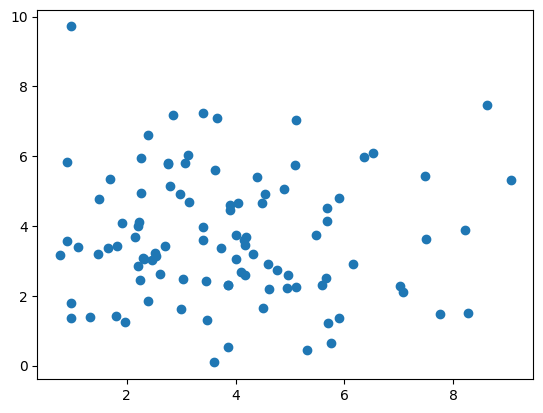

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = np.random.rayleigh(3,200)
data = data.reshape(100,2)
data = pd.DataFrame(data)


X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [ ]:
m = 0
c = 0

L = 0.01  # The learning Rate
epochs = 10000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent
for i in range(epochs):
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c

print (m, c)

-0.03463734089326847 3.8056408335146408


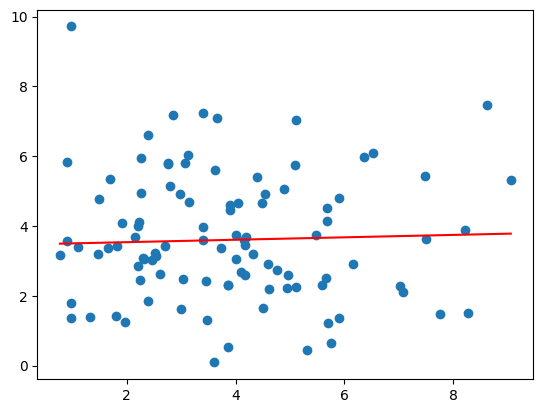

In [ ]:
Y_pred = m*X + c

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

# **Extra's...**

In [ ]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# **Train test split in a dataset**

In [ ]:
X,y = load_diabetes(return_X_y=True)
print(X.shape)
print(y.shape)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

(442, 10)
(442,)


# **Fitting model to data**

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
model.coef_, model.intercept_

(array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
        -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
         861.12700152,   52.42112238]),
 np.float64(151.88331005254167))

# ***Model perfomance metrics***
The Coefficient of determination, also called R² score, is used to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute that is predictable from the input independent variable(s). It is used to check how well-observed results are reproduced by the model, depending on the ratio of the total deviation of results described by the mode

In [ ]:
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568968

#Cost calculation - Loss extimation

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_pred, y_test)
RMSE=np.sqrt(MSE)
RMSE

np.float64(55.627840795469155)

#Gradient Descent method of scikit-learn

In [ ]:
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor(max_iter=1000,learning_rate='constant',eta0=0.01)
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)
reg.coef_, reg.intercept_

(array([  47.84310008,  -91.20636237,  385.54720109,  268.17333782,
           4.00148849,  -49.9688799 , -181.03203691,  124.9444893 ,
         348.52952125,  125.31147086]),
 array([152.00578185]))